# Read me

This script reproduces Figure 5 in [1].

> [1] Rubbens, Anne, Hendrickx, Julien M., and Taylor, Adrien B. "A constructive approach to strengthen algebraic descriptions of function and operator classes."

Given $(x_1,t_1)=([0,0]',[0 ,0]')$, $(x_2,t_2)=([1,-1/2]',[1, 0]')$ $ x_3=[1/2 ,1/2]'$, $\mu=1/2$ and $\beta=1$, it plots the allowed region for $t_3^{(2)}$ as a function of $t_3^{(1)}$, according to 
  
$q_{\mu,\beta}$, satisfied at ${(x_i,t_i),(x_j,t_j)}$ if and only if:
      
>$A_{ij}=-\langle t_i-t_j,x_i-x_j\rangle+\mu \|x_i-x_j\|^2$ and $B_{ij}=-\langle t_i-t_j,x_i-x_j\rangle+\beta \|t_i-t_j\|^2$.

and to $\tilde{q}_{\mu,\beta}$, satisfied at ${(x_i,t_i),(x_j,t_j),(x_k,t_k)}$ if and only if, $\forall \lambda_k, \mu_i, \mu_j\geq 0$:
> $0\geq \lambda_k(\mu_i+\mu_j)(B_{ik}\mu_i+B_{jk}\mu_j)-\lambda_k \mu_i\mu_j B_{ij}+\lambda_k^2 (A_{ik} \mu_i+A_{jk}\mu_j)+A_{ij} \mu_i\mu_j(\mu_i+\mu_j+2\lambda_k-4\beta\mu \lambda_k)$, and
     $0\geq \lambda_k(\mu_i+\mu_j)(A_{ik}\mu_i+A_{jk}\mu_j)-\lambda_k \mu_i\mu_j A_{ij}+\lambda_k^2 (B_{ik} \mu_i+B_{jk}\mu_j)+B_{ij} \mu_i\mu_j(\mu_i+\mu_j+2\lambda_k-4\beta\mu \lambda_k)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Matplotlib is building the font cache; this may take a moment.


In [ ]:
Computation of the extremal value for $t_3^{(2)}$ such that ${(x_1, t_1),(x_2, t_2),(x_3,t_3)}$ satisfies $q_{\mu,\beta}$ or $\tilde{q}_{\mu,\beta}$

Arguments:

>$x_1,t_1,x_2,t_2,x_3,t_{31}$: values of the dataset to be consistent with $q_{\mu,\beta}$ or $\tilde{q}_{\mu,\beta}$

>$L$: parameter of $q_{\mu,\beta}$ or $\tilde{q}_{\mu,\beta}$

>objective: If objective>=0, extremal_val_monotone_cocoercive computes the minimal value for $t_3^{(2)}$. Else, it computes its maximal value.
>
>constr: If constr >= 0, it ensures the set satisfies $q_{\mu,\beta}$. Otherwise, it ensures the set satisfies $\tilde{q}_{\mu,\beta}$.


In [32]:
# For the sake of clarity, t3=[t31, t32]
def extremal_val_monotone_cocoercive(x1,t1,x2,t2,x3,t31,mu,beta,constr,objective):
    options = {'disp': False}
    # Ensuring that {((x1, t1), (x2, t2),(x3,t3)} satisfies q_{mu,beta} or tilde{q}_{mu,beta}.
    cons = [{'type': 'ineq', 'fun': lambda t32: -beta*((t1[0]-t31)**2+(t1[1]-t32)**2)+(t31-t1[0])*(x3[0]-x1[0])+(t32-t1[1])*(x3[1]-x1[1])},
    {'type': 'ineq', 'fun': lambda t32: -beta*((t2[0]-t31)**2+(t2[1]-t32)**2)+(t31-t2[0])*(x3[0]-x2[0])+(t32-t2[1])*(x3[1]-x2[1])},
    {'type': 'ineq', 'fun': lambda t32: -mu*np.linalg.norm(x1 - x3)**2+(t31-t1[0])*(x3[0]-x1[0])+(t32-t1[1])*(x3[1]-x1[1])},
    {'type': 'ineq', 'fun': lambda t32: -mu*np.linalg.norm(x2 - x3)**2+(t31-t2[0])*(x3[0]-x2[0])+(t32-t2[1])*(x3[1]-x2[1])}]
    if constr<=0 and (beta * np.linalg.norm(t1 - t2) ** 2 == np.dot(t2 - t1, x2 - x1)):
        cons.append({'type': 'ineq', 'fun': lambda t32: -((mu* np.linalg.norm(x1 - x2)**2 - np.dot(t2 - t1, x2 - x1))**2 
                                              + (mu* np.linalg.norm(x1 - x3)**2 -(t31-t1[0])*(x3[0]-x1[0])-(t32-t1[1])*(x3[1]-x1[1]) 
                                                 - mu* np.linalg.norm(x2 - x3)**2 +(t31-t2[0])*(x3[0]-x2[0])+(t32-t2[1])*(x3[1]-x2[1]))**2 
                                              - 2 * (mu* np.linalg.norm(x2 - x3)**2 -(t31-t2[0])*(x3[0]-x2[0])-(t32-t2[1])*(x3[1]-x2[1]) 
                                                     + mu* np.linalg.norm(x1 - x3)**2 -(t31-t1[0])*(x3[0]-x1[0])-(t32-t1[1])*(x3[1]-x1[1])) * ( mu* np.linalg.norm(x1 - x2)**2 - np.dot(t2 - t1, x2 - x1)))})
    
    # Initial value for t32
    t32_0 = 1
    # Minimization or maximization of t32
    def fun_obj(t32):
        return t32*objective

    res = minimize(fun_obj, t32_0, constraints=cons, options={'disp': False})
    
    return res.x[0]   


In [37]:
# Dataset and parameters
x1 = np.array([0, 0])
x2 = np.array([1, -1/2])
x3 = np.array([1/2, 1/2])
t1 = np.array([0, 0])
t2 = np.array([1, 0])
beta = 1
mu = 1/2


# Interval of values for h3
N = 100
T31_1 = np.linspace(0.1912,0.566,N)
T31_2 = np.linspace(0.1912,0.56,N)
                   
# Initialize arrays for t32_min and t32_max
t32_min = np.zeros((2, N))
t32_max = np.zeros((2, N))

# Compute the extremal values for t32 as a function of t31
for i in range(N):
    t32_min[0, i] = extremal_val_monotone_cocoercive(x1,t1,x2,t2,x3,T31_1[i],mu,beta,1,1)
    t32_max[0, i] = extremal_val_monotone_cocoercive(x1,t1,x2,t2,x3,T31_1[i],mu,beta,1,-1)
    t32_min[1, i] = extremal_val_monotone_cocoercive(x1,t1,x2,t2,x3,T31_2[i],mu,beta,-1,1)
    t32_max[1, i] = extremal_val_monotone_cocoercive(x1,t1,x2,t2,x3,T31_2[i],mu,beta,-1,-1)

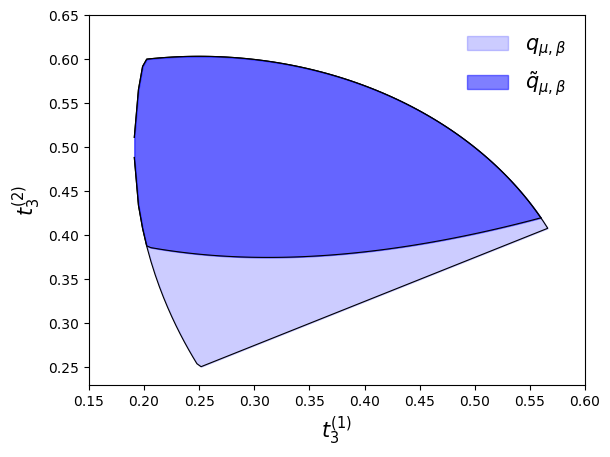

In [38]:
# Plot the result
plt.fill_between(T31_1, t32_min[0, :], t32_max[0, :], color='blue', alpha=0.2, label=r'$q_{\mu,\beta}$')
plt.fill_between(T31_2, t32_min[1, :], t32_max[1, :], color='blue', alpha=0.5, label=r'$\tilde{q}_{\mu,\beta}$')
plt.plot(T31_1, t32_min[0,:], color='black', linewidth=0.8)
plt.plot(T31_1, t32_max[0,:], color='black', linewidth=0.8)
plt.plot(T31_2, t32_min[1,:], color='black', linewidth=0.8) 
plt.plot(T31_2, t32_max[1,:], color='black', linewidth=0.8)
# Adding labels and formatting
plt.xlabel(r'$t_3^{(1)}$', fontsize=15)
plt.ylabel(r'$t_3^{(2)}$', fontsize=15)
plt.xlim([0.15,0.6])
plt.ylim([0.23,0.65])
plt.legend(fontsize=15, loc='upper right', frameon=False)
plt.show()